## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.8, 0.9]

In [9]:
results = {}
for mt in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MT = %.6f" % (mt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mt)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-mt-%s" % str(mt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MT = 0.700000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 363s 7ms/step - loss: 1.4666 - accuracy: 0.4888 - val_loss: 1.5053 - val_accuracy: 0.4724
Epoch 49/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.4621 - accuracy: 0.4895 - val_loss: 1.5096 - val_accuracy: 0.4716
Epoch 50/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.4567 - accuracy: 0.4935 - val_loss: 1.5040 - val_accuracy: 0.4768
Experiment with MT = 0.800000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________________

50000/50000 [==============================] - 12s 246us/step - loss: 1.3730 - accuracy: 0.5186 - val_loss: 1.4426 - val_accuracy: 0.4900
Epoch 46/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.3670 - accuracy: 0.5188 - val_loss: 1.4385 - val_accuracy: 0.4936
Epoch 47/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.3608 - accuracy: 0.5230 - val_loss: 1.4490 - val_accuracy: 0.4857
Epoch 48/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.3567 - accuracy: 0.5245 - val_loss: 1.4225 - val_accuracy: 0.4989
Epoch 49/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.3503 - accuracy: 0.5248 - val_loss: 1.4172 - val_accuracy: 0.5004
Epoch 50/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.3441 - accuracy: 0.5277 - val_loss: 1.4235 - val_accuracy: 0.5002
Experiment with MT = 0.900000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 12s 243us/step - loss: 1.2031 - accuracy: 0.5759 - val_loss: 1.3722 - val_accuracy: 0.5126
Epoch 43/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.1937 - accuracy: 0.5790 - val_loss: 1.4050 - val_accuracy: 0.5006
Epoch 44/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.1884 - accuracy: 0.5822 - val_loss: 1.3691 - val_accuracy: 0.5154
Epoch 45/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.1785 - accuracy: 0.5845 - val_loss: 1.4289 - val_accuracy: 0.5004
Epoch 46/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.1693 - accuracy: 0.5874 - val_loss: 1.4850 - val_accuracy: 0.4881
Epoch 47/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.1640 - accuracy: 0.5899 - val_loss: 1.3530 - val_accuracy: 0.5244
Epoch 48/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.1523 - accuracy: 0.5950 - va

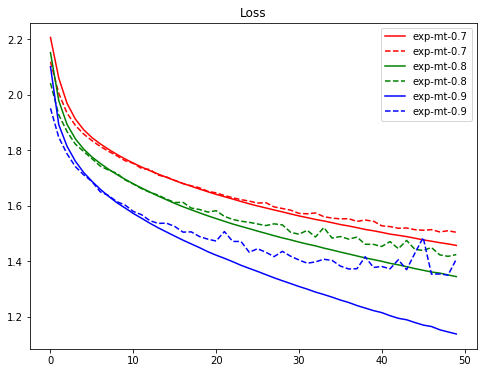

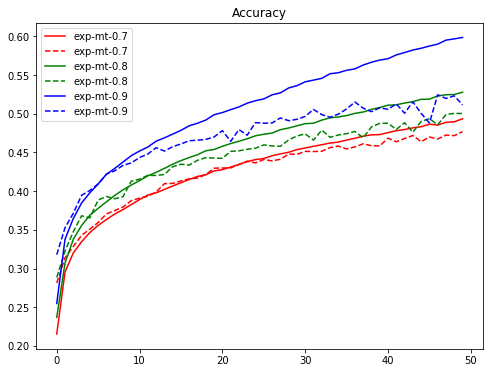

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()